<a href="https://colab.research.google.com/github/sayedmurtaza24/deep-learning-notebooks/blob/main/Shoe_classifier_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shoe Classifier

### Preparing Dataset

Dataset uploaded from local machine, taken from kaggle [here](https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged?resource=download).

In [ ]:
!unzip "/content/drive/MyDrive/shoe_dataset.zip" -d /content/dataset

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

path_to_dataset = "/content/dataset/"

train_dataset = tf.keras.utils.image_dataset_from_directory(path_to_dataset + "train")
test_dataset = tf.keras.utils.image_dataset_from_directory(path_to_dataset + "test", shuffle=False)

train_dataset, test_dataset

Found 711 files belonging to 3 classes.
Found 114 files belonging to 3 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

### Visualize Dataset

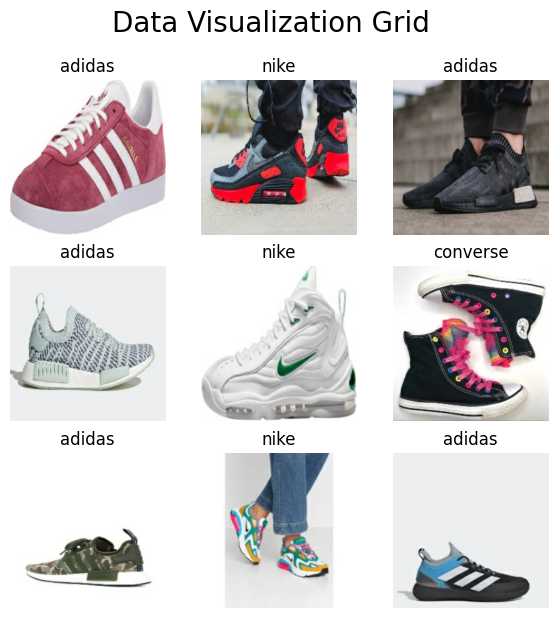

In [4]:
plt.figure(figsize=(7, 7), dpi=100)
plt.suptitle("Data Visualization Grid", fontsize=20)
for i, (image, label) in enumerate(train_dataset.take(1).unbatch()):
  if (i < 9):
    plt.subplot(3, 3, i + 1);
    plt.imshow(image / 255.)
    plt.axis(False)
    plt.title(train_dataset.class_names[label])

### Create the model

In [45]:
import tensorflow_hub as tfhub

tf.random.set_seed(32)

efficientnetb1_hub = "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1";

model_1 = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.applications.EfficientNetV2B1(include_top=False),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation="softmax")
])

model_1.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
history = model_1.fit(train_dataset, epochs=5)

Epoch 1/5
23/23 [==============================] - 53s 2s/step - loss: 0.7568 - accuracy: 0.6850
Epoch 2/5
23/23 [==============================] - 41s 2s/step - loss: 0.3847 - accuracy: 0.8551
Epoch 3/5
23/23 [==============================] - 35s 2s/step - loss: 0.2908 - accuracy: 0.9001
Epoch 4/5
23/23 [==============================] - 29s 1s/step - loss: 0.2216 - accuracy: 0.9170
Epoch 5/5
23/23 [==============================] - 29s 1s/step - loss: 0.2259 - accuracy: 0.9226


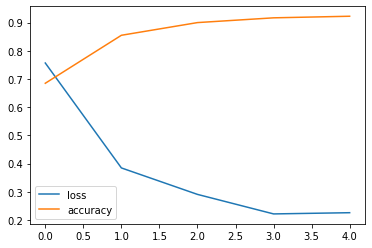

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [48]:
model_1.evaluate(test_dataset)

4/4 [==============================] - 2s 102ms/step - loss: 0.2979 - accuracy: 0.9035


[0.2978745698928833, 0.9035087823867798]

In [49]:
predictions = model_1.predict(test_dataset)

In [50]:
predictions_sparse = tf.argmax(predictions, axis=1)
predictions_sparse

<tf.Tensor: shape=(114,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 0, 2])>

In [66]:
true_labels_sparse = tf.concat([y for x, y in test_dataset.unbatch()], axis=0)
true_labels_sparse

<tf.Tensor: shape=(114,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)>

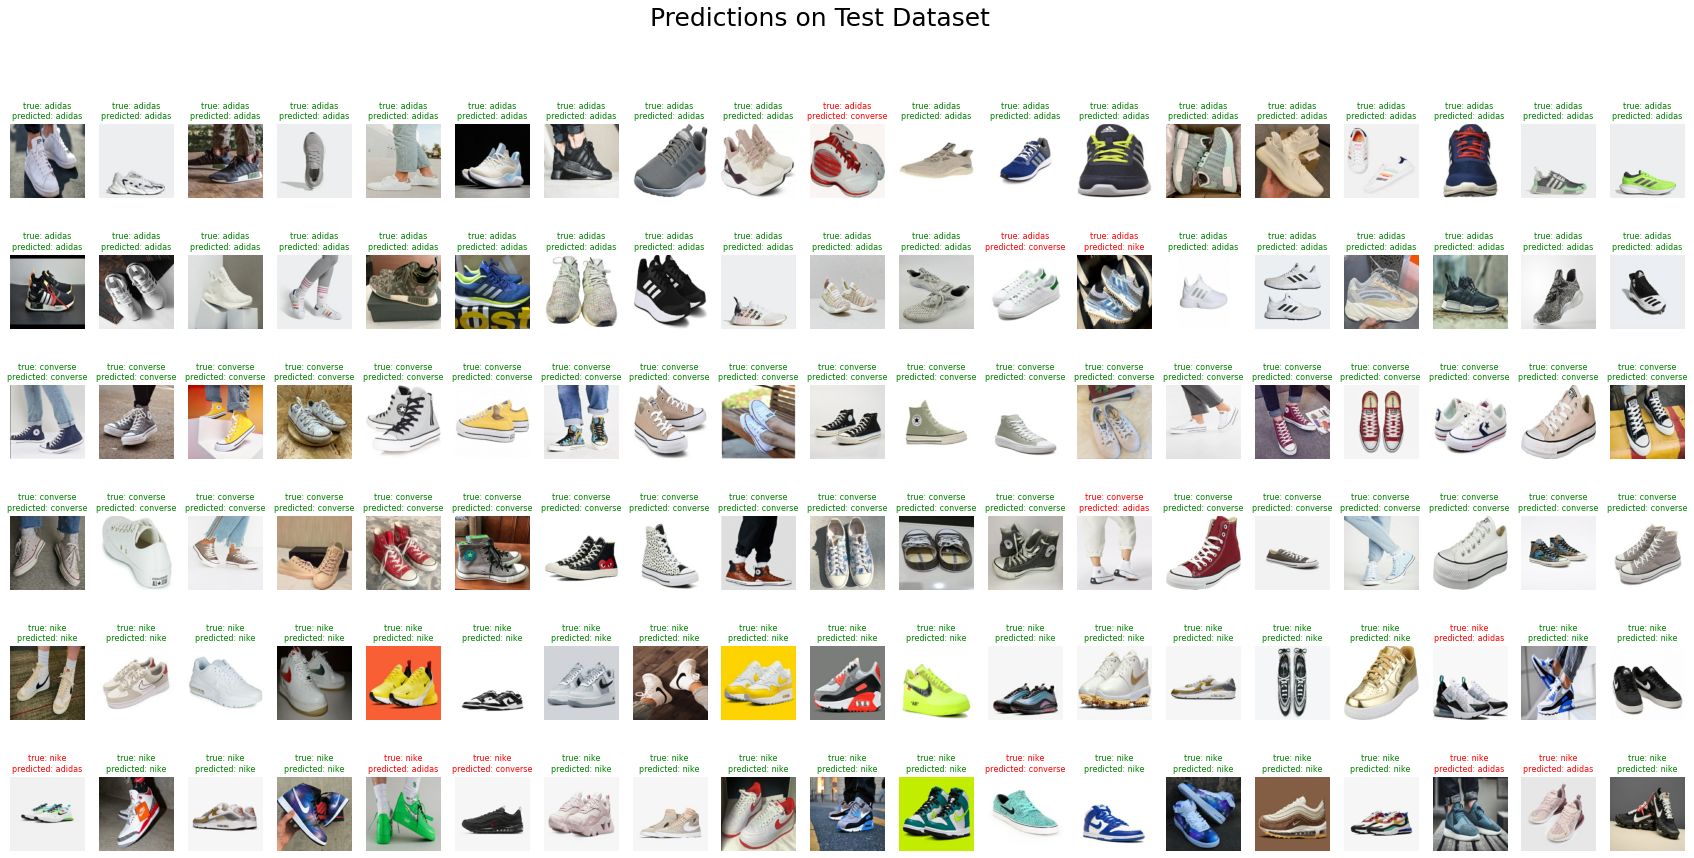

In [64]:
plt.figure(figsize=(30, 14))
plt.suptitle("Predictions on Test Dataset", fontsize=25)

for i, (image, label) in enumerate(test_dataset.unbatch()):
  plt.subplot(6, 19, i + 1)
  plt.imshow(image / 255.)
  true_label = test_dataset.class_names[label]
  predicted_label = test_dataset.class_names[predictions_sparse[i]]
  plt.title("true: " + true_label + "\npredicted: " + predicted_label, color="green" if true_label == predicted_label else "red", fontsize=8)
  plt.axis(False)

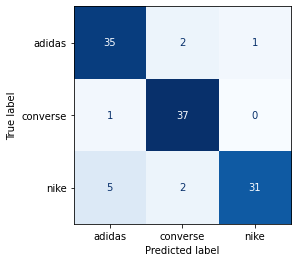

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(true_labels_sparse, predictions_sparse, display_labels=test_dataset.class_names, colorbar=False, cmap="Blues");